In [1]:
                                                    # PART 1
#Go to the Social Security Administration US births website and select the births table there and copy it to your clipboard. 
#Use the pandas read_clipboard function to read the table into Python, and use matplotlib to plot male and female births 
#for the years covered in the data. Put this in an ipython notebook file. 
#In the same notebook, use Python to get a list of male and female names from these files (see part 2).
#This data is broken down by year of birth

In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt

In [14]:
#import webbrowser, clipboard does not work
#website='https://www.ssa.gov/oact/babynames/numberUSbirths.html'
#webbrowser.open(website)

In [15]:
#loading the csv file containing data

df=pd.read_csv('C:/Users/Alessandro/Dropbox/SDSU FALL 2018/LING572 - Python scripting/Python_final_project/data_frame.csv',thousands=',')

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.columns

Index(['Year_of_birth', 'Male', 'Female', 'Total'], dtype='object')

In [18]:
df.head()

,Year_of_birth,Male,Female,Total
0,1880,118400,97605,216005
1,1881,108282,98855,207137
2,1882,122031,115695,237726
3,1883,112477,120059,232536
4,1884,122738,137586,260324


In [19]:
#Correct Data Types
df['Male']=pd.to_numeric(df['Male'])
df['Female']=pd.to_numeric(df['Female'])
df['Total']=pd.to_numeric(df['Total'])
df['Year_of_birth']=pd.to_numeric(df['Year_of_birth'])

In [20]:
len(df)

138

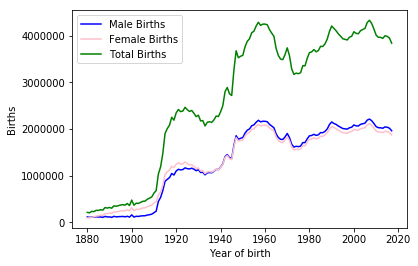

In [21]:
#Figure 1. General female and male poplation growth for 138 years
%matplotlib inline
plt.plot(df['Year_of_birth'], df['Male'], color='blue', label='Male Births')
plt.plot(df['Year_of_birth'], df['Female'], color='pink', label='Female Births')
plt.plot(df['Year_of_birth'], df['Total'], color='green', label='Total Births')

plt.xlabel('Year of birth')
plt.ylabel('Births')
plt.legend()
plt.show()

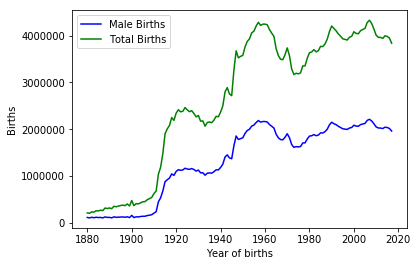

In [22]:
#Figure 2. Male and total births population comparison
plt.plot(df['Year_of_birth'], df['Male'], color='blue', label='Male Births')
plt.plot(df['Year_of_birth'], df['Total'], color='green', label='Total Births')

plt.xlabel('Year of births')
plt.ylabel('Births')
plt.legend()
plt.show()

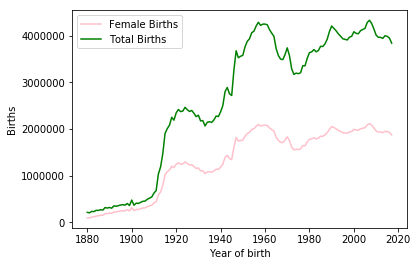

In [23]:
#Figure 3. Female and total births population comparison 
plt.plot(df['Year_of_birth'], df['Female'], color='pink', label='Female Births')
plt.plot(df['Year_of_birth'], df['Total'], color='green', label='Total Births')

plt.xlabel('Year of birth')
plt.ylabel('Births')
plt.legend()
plt.show()

In [24]:
                                                    #PART 2

In [25]:
#Aggregate the data for all years. 
#Use Python Counters to get letter frequencies for male and female names. 
#Use matplotlib to draw a plot that for each letter (x-axis) shows the frequency of that letter (y-axis) 
#as the last letter for both for male and female names

In [26]:
#importing name files from the 'names' folder and aggregating all of them in a single DataFrame

import pandas as pd
years = range(1881,2011)
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = 'names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)
   

In [27]:
#checking data structure
print(names.columns)
print(type(names))
print(len(names))
print(names.head())
print('...')
print(names.tail())

Index(['name', 'sex', 'births', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
1688784
        name sex  births  year
0       Mary   F    6919  1881
1       Anna   F    2698  1881
2       Emma   F    2034  1881
3  Elizabeth   F    1852  1881
4   Margaret   F    1658  1881
...
              name sex  births  year
1688779    Zymaire   M       5  2010
1688780     Zyonne   M       5  2010
1688781  Zyquarius   M       5  2010
1688782      Zyran   M       5  2010
1688783      Zzyzx   M       5  2010


In [28]:
#correct data types
names['births']=pd.to_numeric(names['births'])
names['year']=pd.to_numeric(names['year'])

In [29]:
#total male female births divided by year, pivoting
total_births = names.pivot_table('births','year',
                                 columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802


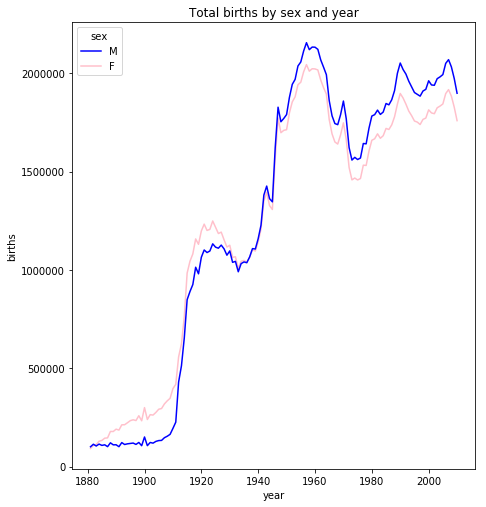

In [30]:
#Figure 4. Plotting pivoted data, female total births, male total births comparison

fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('births')

ax1.set_xlabel('year')
(p1,) = ax1.plot(total_births.index,total_births.F,color='pink',label='F')
(p2, ) = ax1.plot(total_births.index,total_births.M,color='blue',label='M')
ax1.set_title('Total births by sex and year')
    
ax1.legend((p2,p1),('M','F'),loc='upper left',title='sex')
plt.show()


In [31]:
#separate male names from female names
female=names[names['sex'] == 'F']
male=names[names['sex'] == 'M']

In [32]:
                                                    #FEMALE NAMES

In [33]:
female.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [34]:
#lowecasing females names
female_lower = female.name.str.lower()
female_lower.head()

0         mary
1         anna
2         emma
3    elizabeth
4     margaret
Name: name, dtype: object

In [35]:
#creating a list of lists containing letters divided by names
female_name_low_list = [list(x) for x in female_lower]
female_name_low_list[-5:-1]

[['z', 'y', 'l', 'y', 'n', 'n'],
 ['z', 'y', 'n', 'i', 'y', 'a'],
 ['z', 'y', 'o', 'n', 'n', 'a', 'h'],
 ['z', 'y', 'r', 'i', 'a', 'n', 'a']]

In [36]:
#extrating last letter for each name (compare the last letter resulting from the above piece of code with the below code)
female_name_low_list_lastlett = [item[-1] for item in female_name_low_list]
female_name_low_list_lastlett[-5:-1]

['n', 'a', 'h', 'a']

In [37]:
#checking if the lenght of the new list corresponds with the all the intermediate variables
print(len(female.births))
print(len(female_lower))
print(len(female_name_low_list_lastlett))

1003043
1003043
1003043


In [38]:
#Converting to series and to list
female_name_low_list_lastlett_ser=Series(female_name_low_list_lastlett)
female_births_list=list(female.births)

In [39]:
female_lett_reps=female_name_low_list_lastlett_ser*female_births_list
female_lett_reps

0          yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...
1          aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
2          aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
3          hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh...
4          tttttttttttttttttttttttttttttttttttttttttttttt...
5          eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
6          aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
7          eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
8          aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
9          eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
10         aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
11         hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh...
12         aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
13         eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
14         eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
15         eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
16         aaaaaaaaaaaaa

In [40]:
#check lenght for consistency
len(female_lett_reps)

1003043

In [41]:
#counting final letters letter repetition for female names
import collections
f_letter_count = collections.Counter()

for word in female_lett_reps:
      for letter in set(word):
          f_letter_count[letter]+=1
f_letter_count

Counter({'y': 61742,
         'a': 422651,
         'h': 38365,
         't': 10528,
         'e': 226254,
         'l': 35834,
         'n': 101182,
         's': 19402,
         'd': 6464,
         'u': 2019,
         'r': 14056,
         'z': 1843,
         'i': 44042,
         'm': 3610,
         'o': 8316,
         'k': 1548,
         'w': 640,
         'g': 1735,
         'c': 760,
         'x': 843,
         'p': 355,
         'b': 441,
         'f': 125,
         'v': 107,
         'j': 157,
         'q': 24})

In [42]:
#from counter to a pandas series
f_count_ser=pd.Series(f_letter_count)

In [43]:
#sorting letters by index for plotting 
fsort = f_count_ser.sort_index() #sort_values(by=['Letters'])
fsort

a    422651
b       441
c       760
d      6464
e    226254
f       125
g      1735
h     38365
i     44042
j       157
k      1548
l     35834
m      3610
n    101182
o      8316
p       355
q        24
r     14056
s     19402
t     10528
u      2019
v       107
w       640
x       843
y     61742
z      1843
dtype: int64

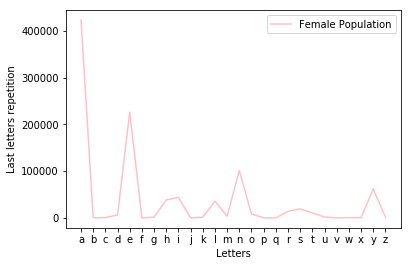

In [85]:
#Figure 5. Plotting female last letters repetition
%matplotlib inline
plt.plot(fsort, color='pink', label='Female Population')

plt.xlabel('Letters')
plt.ylabel('Last letters repetition')
plt.legend()
plt.show()

In [45]:
                                                        #MALE NAMES
#Lowering case in the male.name column
male_lower = male.name.str.lower()
male_lower.head()

938       john
939    william
940      james
941     george
942    charles
Name: name, dtype: object

In [46]:
#creating a list of lists containg letter for each name
male_name_low_list = [list(x) for x in male_lower]
male_name_low_list[-5:-1]

[['z', 'y', 'm', 'a', 'i', 'r', 'e'],
 ['z', 'y', 'o', 'n', 'n', 'e'],
 ['z', 'y', 'q', 'u', 'a', 'r', 'i', 'u', 's'],
 ['z', 'y', 'r', 'a', 'n']]

In [47]:
#extrating last letter for each name (compare the last letter resulting from the above piece of code with the below code)
male_name_low_list_last_lett = [item[-1] for item in male_name_low_list]
male_name_low_list_last_lett[-5:-1]

['e', 'e', 's', 'n']

In [48]:
#check lenght for consistency
print(len(male))
print(len(male_lower))
print(len(male_name_low_list_last_lett))

685741
685741
685741


In [49]:
#Converting to series and to list
male_name_low_list_lastlett_ser = Series(male_name_low_list_last_lett)
male_births_list                = list(male.births)

In [50]:
#male names final letters repetitions
male_lett_reps = male_name_low_list_lastlett_ser * male_births_list
male_lett_reps

0         nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...
1         mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm...
2         ssssssssssssssssssssssssssssssssssssssssssssss...
3         eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
4         ssssssssssssssssssssssssssssssssssssssssssssss...
5         kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...
6         hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh...
7         yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...
8         ssssssssssssssssssssssssssssssssssssssssssssss...
9         dddddddddddddddddddddddddddddddddddddddddddddd...
10        tttttttttttttttttttttttttttttttttttttttttttttt...
11        yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...
12        rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr...
13        rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr...
14        dddddddddddddddddddddddddddddddddddddddddddddd...
15        tttttttttttttttttttttttttttttttttttttttttttttt...
16        llllllllllllllllllllllllllllll

In [51]:
len(male_lett_reps)

685741

In [52]:
#counting male names final letters 
import collections
m_letter_count = collections.Counter()

for word in male_lett_reps:
      for letter in set(word):
          m_letter_count[letter]+=1
m_letter_count

Counter({'n': 162164,
         'm': 12404,
         's': 51797,
         'e': 89489,
         'k': 13634,
         'h': 17462,
         'y': 53839,
         'd': 36761,
         't': 21226,
         'r': 39092,
         'l': 59630,
         'w': 2230,
         'b': 3222,
         'a': 24564,
         'c': 5033,
         'o': 54056,
         'p': 1941,
         'x': 1920,
         'i': 17253,
         'f': 3042,
         'g': 5071,
         'v': 1379,
         'u': 2657,
         'z': 4175,
         'j': 1200,
         'q': 500})

In [53]:
#from counter to a pandas series
m_count_ser=pd.Series(m_letter_count)

In [54]:
#sorting letters by index for plotting
msort = m_count_ser.sort_index() #sort_values(by=['Letters'])
msort

a     24564
b      3222
c      5033
d     36761
e     89489
f      3042
g      5071
h     17462
i     17253
j      1200
k     13634
l     59630
m     12404
n    162164
o     54056
p      1941
q       500
r     39092
s     51797
t     21226
u      2657
v      1379
w      2230
x      1920
y     53839
z      4175
dtype: int64

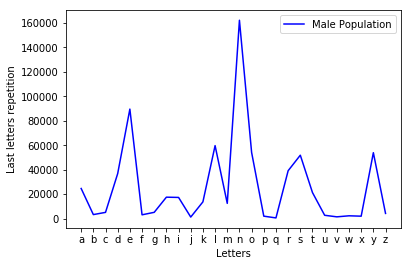

In [55]:
#Figure 6. Plotting male last letters repetition
%matplotlib inline
plt.plot(msort, color='blue', label='Male Population')

plt.xlabel('Letters')
plt.ylabel('Last letters repetition')
plt.legend()
plt.show()

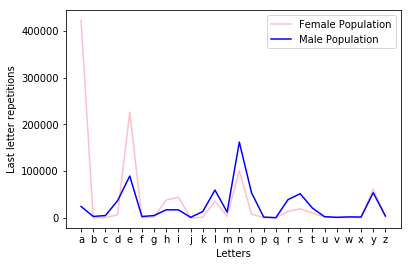

In [56]:
#Figure 7. Female and male last letters repetition comparison
%matplotlib inline
plt.plot(fsort, color='pink', label='Female Population')
plt.plot(msort, color='blue', label='Male Population')

plt.xlabel('Letters')
plt.ylabel('Last letter repetitions')
plt.legend()
plt.show()

In [57]:
                                                    #PART 3

In [58]:
#Now do just female names, but aggregate your data in decades (10 year) increments.
#Produce a plot that contains the 1880s line, the 1940s line, and the 1990s line, as 
#well as the female line for all years aggregated together from Part Two. Evaluate how stable this statistic is. 
#Speculate on why it is is stable, if it is, or on what demographic facts might explain any changes, if there are any. 
#Turn in your ipython notebook file, showing the code you used to complete parts One, Two, an Three.

In [59]:
#isolting column of interest
names_rep=female.ix[:,['name','births','year']]
names_rep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,name,births,year
0,Mary,6919,1881
1,Anna,2698,1881
2,Emma,2034,1881
3,Elizabeth,1852,1881
4,Margaret,1658,1881
5,Minnie,1653,1881
6,Ida,1439,1881
7,Annie,1326,1881
8,Bertha,1324,1881
9,Alice,1308,1881


In [60]:
#converting fmale names to list
qqq=list(names_rep.name)
qqq

['Mary',
 'Anna',
 'Emma',
 'Elizabeth',
 'Margaret',
 'Minnie',
 'Ida',
 'Annie',
 'Bertha',
 'Alice',
 'Clara',
 'Sarah',
 'Ella',
 'Nellie',
 'Grace',
 'Florence',
 'Martha',
 'Cora',
 'Laura',
 'Carrie',
 'Maude',
 'Bessie',
 'Mabel',
 'Gertrude',
 'Ethel',
 'Jennie',
 'Edith',
 'Hattie',
 'Mattie',
 'Julia',
 'Rose',
 'Lillian',
 'Lillie',
 'Eva',
 'Jessie',
 'Lula',
 'Myrtle',
 'Pearl',
 'Edna',
 'Catherine',
 'Ada',
 'Louise',
 'Helen',
 'Lucy',
 'Frances',
 'Dora',
 'Fannie',
 'Josephine',
 'Daisy',
 'Lena',
 'Maggie',
 'Katherine',
 'Rosa',
 'Marie',
 'Nora',
 'Effie',
 'Blanche',
 'May',
 'Nancy',
 'Della',
 'Agnes',
 'Nettie',
 'Sallie',
 'Stella',
 'Ellen',
 'Mamie',
 'Lizzie',
 'Susie',
 'Sadie',
 'Elsie',
 'Maud',
 'Flora',
 'Caroline',
 'Etta',
 'Mae',
 'Lulu',
 'Lydia',
 'Alma',
 'Susan',
 'Lottie',
 'Addie',
 'Mollie',
 'Katie',
 'Ruth',
 'Harriet',
 'Kate',
 'Amanda',
 'Nannie',
 'Georgia',
 'Emily',
 'Eliza',
 'Viola',
 'Amelia',
 'Willie',
 'Charlotte',
 'Rebecca',


In [61]:
#extracting last letter from female names 
www = [item[-1] for item in qqq]
www

['y',
 'a',
 'a',
 'h',
 't',
 'e',
 'a',
 'e',
 'a',
 'e',
 'a',
 'h',
 'a',
 'e',
 'e',
 'e',
 'a',
 'a',
 'a',
 'e',
 'e',
 'e',
 'l',
 'e',
 'l',
 'e',
 'h',
 'e',
 'e',
 'a',
 'e',
 'n',
 'e',
 'a',
 'e',
 'a',
 'e',
 'l',
 'a',
 'e',
 'a',
 'e',
 'n',
 'y',
 's',
 'a',
 'e',
 'e',
 'y',
 'a',
 'e',
 'e',
 'a',
 'e',
 'a',
 'e',
 'e',
 'y',
 'y',
 'a',
 's',
 'e',
 'e',
 'a',
 'n',
 'e',
 'e',
 'e',
 'e',
 'e',
 'd',
 'a',
 'e',
 'a',
 'e',
 'u',
 'a',
 'a',
 'n',
 'e',
 'e',
 'e',
 'e',
 'h',
 't',
 'e',
 'a',
 'e',
 'a',
 'y',
 'a',
 'a',
 'a',
 'e',
 'e',
 'a',
 'e',
 'n',
 'e',
 'e',
 'a',
 'e',
 'h',
 'a',
 'r',
 'a',
 'a',
 'a',
 'e',
 'e',
 'a',
 'h',
 'a',
 'l',
 'd',
 'e',
 'a',
 'y',
 'a',
 'a',
 'a',
 'e',
 'n',
 'a',
 'a',
 'e',
 'a',
 'e',
 'a',
 'a',
 'a',
 'a',
 'y',
 'a',
 'n',
 'e',
 'a',
 'u',
 'e',
 'y',
 'a',
 'r',
 'n',
 'y',
 'a',
 'a',
 'e',
 'e',
 'e',
 'z',
 'e',
 'a',
 'a',
 'e',
 'a',
 'e',
 't',
 'e',
 'e',
 'a',
 'a',
 'e',
 'a',
 'e',
 'e',
 'e',
 'd'

In [62]:
#checking lenght for consistency 
print(len(names_rep))
print(len(www))

1003043
1003043


In [63]:
#adding final letters to the dataframe
names_rep['final_let']=www

In [64]:
names_rep.head()

,name,births,year,final_let
0,Mary,6919,1881,y
1,Anna,2698,1881,a
2,Emma,2034,1881,a
3,Elizabeth,1852,1881,h
4,Margaret,1658,1881,t


In [65]:
#adding a column with name's final letter repetitions
names_rep['reps']=names_rep.final_let*names_rep.births

In [66]:
#cheching if final letter reps and number of births for index 0 corresponds 
print(len(names_rep.reps[0]))
print(names_rep.births[0])

6919
6919


In [67]:
#show the updated dataframe
names_rep

,name,births,year,final_let,reps
0,Mary,6919,1881,y,yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...
1,Anna,2698,1881,a,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
2,Emma,2034,1881,a,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
3,Elizabeth,1852,1881,h,hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh...
4,Margaret,1658,1881,t,tttttttttttttttttttttttttttttttttttttttttttttt...
5,Minnie,1653,1881,e,eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
6,Ida,1439,1881,a,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
7,Annie,1326,1881,e,eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
8,Bertha,1324,1881,a,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
9,Alice,1308,1881,e,eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...


In [68]:
#check lenght for consistency
len(names_rep)

1003043

In [69]:
#reindex records
names_rep.index=np.arange(0,1003043)

In [70]:
#quering for 1880 decade
eighties=names_rep.query("year <= 1890 and year >= 1880 ")
#quering for 1940 decade
fourties=names_rep.query("year <= 1949 and year >= 1940 ")
#quering for 1990 decade
nineties = names_rep.query("year <= 1999 and year >= 1990 ")



#isolating letters repetitions 
eighties_reps = eighties.reps
fourties_reps = fourties.reps
nineties_reps = nineties.reps

In [71]:
eighties_lett_count = collections.Counter()

for word in eighties_reps:
      for letter in set(word):
          eighties_lett_count[letter]+=1
eighties_lett_count

Counter({'y': 676,
         'a': 5370,
         'h': 345,
         't': 149,
         'e': 4379,
         'l': 367,
         'n': 383,
         's': 252,
         'd': 130,
         'u': 24,
         'r': 208,
         'z': 14,
         'i': 28,
         'm': 36,
         'o': 64,
         'k': 14,
         'w': 3,
         'g': 18,
         'c': 2,
         'x': 2})

In [72]:
fourties_lett_count = collections.Counter()

for word in fourties_reps:
      for letter in set(word):
          fourties_lett_count[letter]+=1
fourties_lett_count

Counter({'y': 3178,
         'a': 20207,
         'h': 928,
         'l': 2580,
         't': 629,
         'e': 16640,
         'n': 6135,
         's': 1470,
         'd': 486,
         'r': 719,
         'o': 333,
         'i': 1308,
         'm': 135,
         'z': 75,
         'u': 120,
         'k': 66,
         'g': 85,
         'w': 31,
         'x': 44,
         'p': 19,
         'v': 10,
         'b': 18,
         'c': 14})

In [73]:
nineties_lett_count = collections.Counter()

for word in nineties_reps:
      for letter in set(word):
          nineties_lett_count[letter]+=1
nineties_lett_count

Counter({'a': 71322,
         'y': 10689,
         'h': 7263,
         'e': 28064,
         'r': 2218,
         'n': 17677,
         'l': 4734,
         's': 2434,
         't': 1454,
         'i': 8893,
         'm': 672,
         'd': 663,
         'z': 348,
         'o': 1083,
         'x': 157,
         'k': 233,
         'w': 93,
         'c': 159,
         'g': 331,
         'b': 105,
         'u': 349,
         'f': 28,
         'p': 100,
         'j': 55,
         'v': 19,
         'q': 2})

In [74]:
#from dict to series 
eight_ser = pd.Series(eighties_lett_count)
fourties_ser = pd.Series(fourties_lett_count)
nineties_ser = pd.Series(nineties_lett_count)
#sorting dictionaries by letter (index)
eighty_sort = eight_ser.sort_index()
fouties_sort = fourties_ser.sort_index()
nineties_sort = nineties_ser.sort_index()

In [75]:
eighty_sort

a    5370
c       2
d     130
e    4379
g      18
h     345
i      28
k      14
l     367
m      36
n     383
o      64
r     208
s     252
t     149
u      24
w       3
x       2
y     676
z      14
dtype: int64

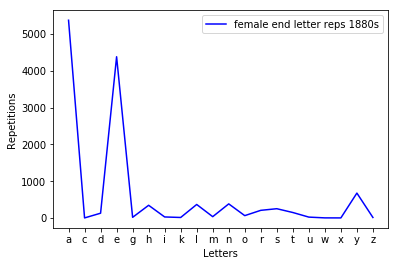

In [76]:
#Figure 8. Total female last letters during the 1880s decade
%matplotlib inline
#plt.plot(fsort, color='pink', label='Total female end letter reps')
plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
#plt.plot(fouties_sort, color='black', label="female end letter reps 1940s")
#plt.plot(nineties_sort, color='orange', label="female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

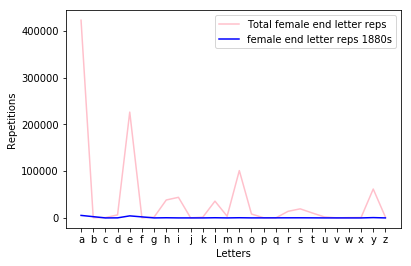

In [77]:
#Figure 9. Total female last letters compared with 1880s decades female last letter
%matplotlib inline
plt.plot(fsort, color='pink', label='Total female end letter reps')
plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
#plt.plot(fouties_sort, color='black', label="female end letter reps 1940s")
#plt.plot(nineties_sort, color='orange', label="female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

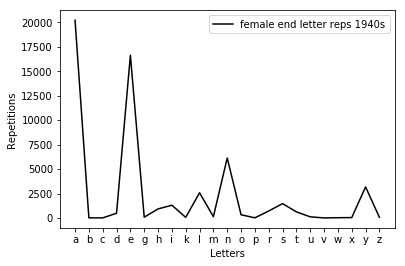

In [78]:
#Figure 10. Total female last letters compared with 1940s decades female last letter

%matplotlib inline
#plt.plot(fsort, color='pink', label='Total female end letter reps')
#plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
plt.plot(fouties_sort, color='black', label="female end letter reps 1940s")
#plt.plot(nineties_sort, color='orange', label="female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

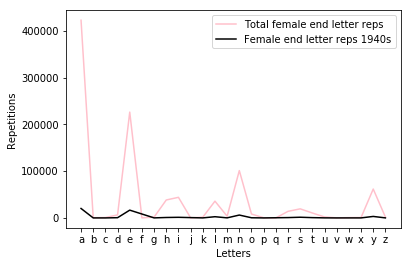

In [79]:
#Figure 11. Total female last letters compared with 1880s decades female last letter
%matplotlib inline
plt.plot(fsort, color='pink', label='Total female end letter reps')
#plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
plt.plot(fouties_sort, color='black', label="Female end letter reps 1940s")
#plt.plot(nineties_sort, color='orange', label="female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

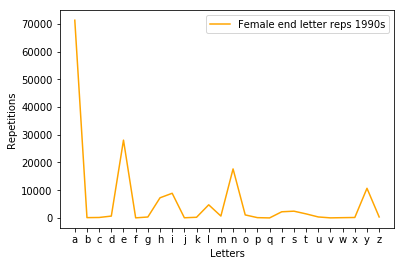

In [80]:
#Figure 12. Total female last letters compared with 1880s decades female last letter
%matplotlib inline
#plt.plot(fsort, color='pink', label='Total female end letter reps')
#plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
#plt.plot(fouties_sort, color='black', label="female end letter reps 1940s")
plt.plot(nineties_sort, color='orange', label="Female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

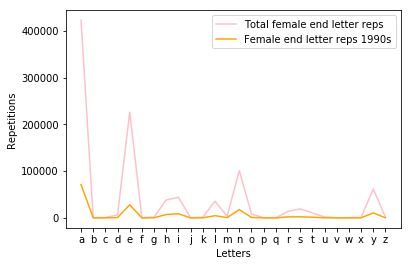

In [81]:
#Figure 13. Total female last letters compared with 1990s decades female last letter

%matplotlib inline
plt.plot(fsort, color='pink', label='Total female end letter reps')
#plt.plot(eighty_sort, color='blue', label="female end letter reps 1880s")
#plt.plot(fouties_sort, color='black', label="female end letter reps 1940s")
plt.plot(nineties_sort, color='orange', label="Female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

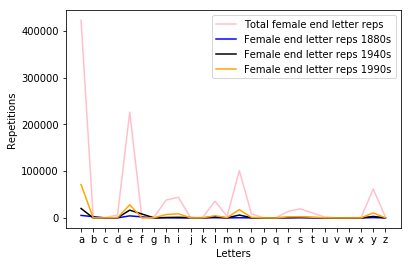

In [82]:
#Figure 14. Total female last letters compared with 1880s, 1940s,and 1990s decades female last letter

%matplotlib inline
plt.plot(fsort, color='pink', label='Total female end letter reps')
plt.plot(eighty_sort, color='blue', label="Female end letter reps 1880s")
plt.plot(fouties_sort, color='black', label="Female end letter reps 1940s")
plt.plot(nineties_sort, color='orange', label="Female end letter reps 1990s")

plt.xlabel('Letters')
plt.ylabel('Repetitions')
plt.legend()
plt.show()

In [83]:
#Considering the total number of births, the different decades part of this analysis, and the pool of elements (born female), 
#the statistic looks pretty consitent and stable. 

#As Figure 8 through Figure 14 show, the pattern gets more consitent witht the total female births: the more we move foreward
#the mode it looks like the weight of the decade gets hevier. 
#If we analyze the first comparison (see Figure 9), the female end letter line looks almost flat compared with the total last letter
#reps. It clearly shows that that decade weight is not that relevant if we consider the total births, in other words not that many 
#female were born in that decade compared with the total, and it looks like it does not follow the patter of the total births 
#(see Figure 9 throug 12 pink line)

#On the other hand, if we take a quick look at Figure 8 and the pink line at Figure 9, it is clear that the 1880 decade heavily follow 
#the 'Total female and letter reps' pattern.
#Yet, if we give a quick look at Figures 10 and 12,it is easy to notice that all of the considered decades follow the same pattern as
#the total female last letter repetitions.


#How come?

#From a demographic stand point all of these decades correspond to period of demographic growth, because of the 
# second industrial revolution started during the first considered decade (1880).
#After WW2, with the early '40s' baby boomers
#During the 90s then the baby boomers peak was almost exceeded since the congress quadrupled the traditional immigration acceptance. 
#(See Appendix A)
#(source: https://www.numbersusa.com/content/learn/overpopulation/biggest-population-boom-ever.html)

#From a linguistic stand point, the patter bases its reasons on the fact that most of the adopted female names 
#in the United states end with a,e,h,i,l,n,s,y (see Figure 14).

In [84]:
                                     # Appendix A: number of female births per decade

#divide Year_of_birth in deacades adding (sum) female births
df_female=names_rep.groupby((names_rep.year//10)*10)['births'].agg('sum')
df_female


#divide Year_of_birth in deacades adding (sum) male births
#df_male=df.groupby((df.Year_of_birth//10)*10)['Male'].agg('sum')

year
1880     1221726
1890     2221592
1900     2927622
1910     8155229
1920    11950537
1930    10659707
1940    14480943
1950    19227015
1960    18260219
1970    15447643
1980    17163190
1990    17992167
2000    18432547
2010     1759010
Name: births, dtype: int64